In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nettoyage des bases de données

In [140]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\arceb\Desktop\Stage\Attrib 2018 MGP - RM positif - MVI pour CBA.xlsx'))

On va commencer par travailler sur la base de donnée des demandeurs pour estimer les différents quartiles de revenus parmis les demandeurs de la base de donnée. On va donc nettoyer la base, et créer une nouvelle colonne dans le dataframe indiquant le quartile auquel appartient le ménage. Cette information va permettre ensuite d'analyser le taux d'attente des demandeurs qui ont reçu un logement dans l'année en fonction de leur quartile d'appartenance.

In [141]:
df

,Unnamed: 0,région,Numéro Unique,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Code département logement actuel,Code INSEE logt actuel,Commune logt actuel,...,Code de la commune attribuée,Région du logement attribué,Type du logement attribué,Est en QPV,Surface du logement attribué,Statut DALO,Date de la décision DALO\n\n,Accompagnement social,Diagnostic social,Réservataire
0,NaN,Ile-de-France,111011885857794043,2018-01-15,2018-06-08,37,Marié (e),94,94043,Le Kremlin-Bicêtre,...,94067,Ile-de-France,T3,Ne sait pas,64,Non renseigné,NaT,Non,Non,Action Logement
1,NaN,Ile-de-France,111051767234510108,2017-05-15,2018-06-01,54,Séparé (e),94,94017,Champigny-sur-Marne,...,94079,Ile-de-France,T3,Non,70,Non renseigné,NaT,Non,Non,Action Logement
2,NaN,Ile-de-France,111091777617075056,2017-09-29,2018-11-26,32,Concubin (e),94,94068,Saint-Maur-des-Fossés,...,93057,Ile-de-France,T2,Non,46,Non renseigné,NaT,Non,Non,Action Logement
3,NaN,Ile-de-France,111021758912175056,2017-02-08,2018-01-03,28,Célibataire,94,94017,Champigny-sur-Marne,...,75117,Ile-de-France,T1,Non,27,Non renseigné,NaT,Non,Non,Contingent préfet fonctionnaires et agents pub...
4,NaN,Ile-de-France,111111781080175056,2017-11-10,2018-04-01,45,Célibataire,75,75104,Paris 4ème arrondissement,...,75104,Ile-de-France,T1,Non,16,Non renseigné,NaT,Non,Non,"Contingent des collectivités territoriales, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,NaN,Ile-de-France,111011885009910129,2018-01-04,2018-04-24,54,Célibataire,91,91174,Corbeil-Essonnes,...,91687,Ile-de-France,T3,Non,57,Non renseigné,NaT,Non,Non,Contingent préfet fonctionnaires et agents pub...
42744,NaN,Ile-de-France,1111217829952GDPUB,2017-12-03,2018-02-12,33,Marié (e),75,75114,Paris 14ème arrondissement,...,75114,Ile-de-France,T3,Non,71,Non renseigné,NaT,Non,Non,Hors contingent
42745,NaN,Ile-de-France,111111782174292019,2017-11-23,2018-08-07,66,Marié (e),92,92019,Châtenay-Malabry,...,92019,Ile-de-France,T4,Non,81,Non renseigné,NaT,Non,Non,"Contingent des collectivités territoriales, de..."
42746,NaN,Ile-de-France,111091647518710129,2016-09-23,2018-05-25,61,Marié (e),93,93005,Aulnay-sous-Bois,...,93005,Ile-de-France,T3,Oui,64,Non renseigné,NaT,Non,Non,Hors contingent


In [146]:
dfd1=df[[ "Numéro Unique", "Nb unités de consommation du foyer", "Ressources mensuelles du foyer", "Date création demande", "Date de la radiation", "Age demandeur", "Situation familiale", "Type du logement attribué", "motif n°1 de la demande", "Surface du logement attribué"]]
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


On ne conserve que les colonnes qui vont nous intéresser dans le cadre de l'étude du taux d'attente.

#### Application des filtres

On convertir en NaN les valeurs qui doivent être filtrées, à savoir:
- les NaN (les valeurs qui ne sont pas renseignées), les revenus qui ne sont pas indiqués
- les revenus qui ne sont pas strictement supérieurs à 0
- les revenus qui sont supérieurs à 10000

In [147]:
dfd1.dropna()

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


In [148]:
indexNames = dfd1[ dfd1['Ressources mensuelles du foyer'] < 0 ].index
dfd1.drop(indexNames , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\519414860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


In [145]:
indexNames1 = dfd1[ dfd1['Ressources mensuelles du foyer'] > 10000 ].index
dfd1.drop(indexNames1 , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2081586591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames1 , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42695,111031891371492044,1.5,9120,2018-03-19,2018-07-03,33,Marié (e),T3,Logement repris ou mis en vente par son propri...,58
42697,111061897945710012,1.5,9800,2018-06-01,2018-06-26,62,Marié (e),T3,Logement trop grand,81
42701,111031897446894B01,1.0,7165,2018-03-05,2018-08-31,40,Célibataire,T2,Autre motif particulier (précisez),49
42705,1110718017084GDPUB,1.0,7450,2018-07-27,2018-10-18,25,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,18


dfd1 donne désormais la base de  données filtrée. On va pouvoir déterminer les quartiles de revenus.

#### Détermination des quintiles

On calcule dans un premier temps le revenu par unité de consommation.

In [149]:
UC=dfd1["Nb unités de consommation du foyer"]
revenu=dfd1["Ressources mensuelles du foyer"]
dfd1['revenu_par_UC']=revenu/UC
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2797935456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['revenu_par_UC']=revenu/UC


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000


Il s'agit désormais de déterminer les quintiles.

In [150]:
dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\325979235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel


In [151]:
dfd1['Revenus annuels']

0             6.666667
1             8.000000
2             8.000000
3            12.000000
4            12.000000
             ...      
42743    567312.000000
42744    594426.666667
42745    595656.000000
42746    634764.000000
42747    720542.400000
Name: Revenus annuels, Length: 42748, dtype: float64

In [152]:
dfd1['Revenus annuels'].describe()

count     42748.000000
mean      17399.783620
std       12711.189329
min           6.666667
25%       12000.000000
50%       16266.750000
75%       21185.128205
max      720542.400000
Name: Revenus annuels, dtype: float64

In [153]:
dfd1['Revenus annuels'].describe(percentiles=[.2, .4, .6, .8])#pour avoir les quintiles

count     42748.000000
mean      17399.783620
std       12711.189329
min           6.666667
20%       11028.000000
40%       14603.076923
50%       16266.750000
60%       18000.000000
80%       22480.000000
max      720542.400000
Name: Revenus annuels, dtype: float64

On a les quantiles de revenu annuel :
- 20%= 11023.542857
- 40%= 14593.846154
- 60%= 18000.000000
- 80%= 22451.657143

A partir de ces valeurs on va déterminer dans une nouvelle colonne 5 groupes de quintiles d'appartenance des demandeurs.

In [154]:
dfd1['Catégorie'] = ""

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\590966780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Catégorie'] = ""


In [155]:
dfd1['Catégorie']=pd.cut(dfd1['revenu_par_UC'], [0, 1063.571429, 200000], labels=['Pauvres', 'Autres'])

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2193730149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Catégorie']=pd.cut(dfd1['revenu_par_UC'], [0, 1063.571429, 200000], labels=['Pauvres', 'Autres'])


In [156]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres


#### Création des tranches d'âge

In [157]:
dfd1['Age'] = ""
dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2946466155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age'] = ""
C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2946466155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres,50 à 59 ans
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres,30 à 39 ans
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres,60 à 69ans
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres,60 à 69ans


#### Travail sur le temps d'attente

Pour travailler sur le taux d'attente, on va fusionner à notre base de données des demandeurs filtrée à la base attributaires et calculer les taux d'attente des personnes attributaires dans l'année en fonction de la date de leur demande et de la date de leur acceptation.

In [158]:
dfd1['Date création demande']

0       2018-01-15
1       2017-05-15
2       2017-09-29
3       2017-02-08
4       2017-11-10
           ...    
42743   2018-01-04
42744   2017-12-03
42745   2017-11-23
42746   2016-09-23
42747   2012-04-23
Name: Date création demande, Length: 42748, dtype: datetime64[ns]

In [159]:
dfd1['Date création demande'] = pd.to_datetime(dfd1['Date création demande'], format="%Y/%m/%d %H:%M:%S")

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2437625387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Date création demande'] = pd.to_datetime(dfd1['Date création demande'], format="%Y/%m/%d %H:%M:%S")


In [160]:
dfd1['Date de la radiation'] = pd.to_datetime(dfd1['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2687287794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Date de la radiation'] = pd.to_datetime(dfd1['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres,50 à 59 ans
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres,30 à 39 ans
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres,60 à 69ans
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres,60 à 69ans


In [161]:
timedelta = dfd1['Date de la radiation']-dfd1['Date création demande']
dfd1['Temps attente']= timedelta
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\3060396335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente']= timedelta


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans,144 days
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans,382 days
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans,423 days
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans,329 days
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans,142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres,50 à 59 ans,110 days
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres,30 à 39 ans,71 days
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres,60 à 69ans,257 days
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres,60 à 69ans,609 days


In [162]:
dfd1['Temps attente'] = dfd1['Temps attente'].values.astype(np.int64)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\604223667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente'] = dfd1['Temps attente'].values.astype(np.int64)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans,12441600000000000
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans,33004800000000000
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans,36547200000000000
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans,28425600000000000
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans,12268800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres,50 à 59 ans,9504000000000000
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres,30 à 39 ans,6134400000000000
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres,60 à 69ans,22204800000000000
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres,60 à 69ans,52617600000000000


In [163]:
dfd1['Temps attente']=(dfd1['Temps attente']//(86400000000000))

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\69685166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente']=(dfd1['Temps attente']//(86400000000000))


In [164]:
dfd1['Durée effective attente']=pd.cut(dfd1['Temps attente'], [0, 365, 730, 1095, 1460, 1825, 3650, 5000000], labels=['Moins d\'un an', 'Entre 1 an et 2 ans', 'Entre 2 ans et 3 ans', 'Entre 3 ans et 4 ans', 'Entre 4 ans et 5 ans', 'Entre 5 ans et 10 ans', 'Plus de 10 ans'])

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\1707454635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Durée effective attente']=pd.cut(dfd1['Temps attente'], [0, 365, 730, 1095, 1460, 1825, 3650, 5000000], labels=['Moins d\'un an', 'Entre 1 an et 2 ans', 'Entre 2 ans et 3 ans', 'Entre 3 ans et 4 ans', 'Entre 4 ans et 5 ans', 'Entre 5 ans et 10 ans', 'Plus de 10 ans'])


In [165]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente,Durée effective attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans,144,Moins d'un an
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans,382,Entre 1 an et 2 ans
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans,423,Entre 1 an et 2 ans
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans,329,Moins d'un an
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans,142,Moins d'un an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57,47276.000000,567312.000000,Autres,50 à 59 ans,110,Moins d'un an
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71,49535.555556,594426.666667,Autres,30 à 39 ans,71,Moins d'un an
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81,49638.000000,595656.000000,Autres,60 à 69ans,257,Moins d'un an
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64,52897.000000,634764.000000,Autres,60 à 69ans,609,Entre 1 an et 2 ans


In [166]:
dfd1[dfd1['Catégorie']=='Pauvres'].count()

Numéro Unique                         12471
Nb unités de consommation du foyer    12471
Ressources mensuelles du foyer        12471
Date création demande                 12471
Date de la radiation                  12471
Age demandeur                         12471
Situation familiale                   12471
Type du logement attribué             12471
motif n°1 de la demande               12471
Surface du logement attribué          12471
revenu_par_UC                         12471
Revenus annuels                       12471
Catégorie                             12471
Age                                   12471
Temps attente                         12471
Durée effective attente               12470
dtype: int64

In [167]:
dfd1[dfd1['Catégorie']=='Autres'].count()

Numéro Unique                         30277
Nb unités de consommation du foyer    30277
Ressources mensuelles du foyer        30277
Date création demande                 30277
Date de la radiation                  30277
Age demandeur                         30277
Situation familiale                   30277
Type du logement attribué             30277
motif n°1 de la demande               30277
Surface du logement attribué          30277
revenu_par_UC                         30277
Revenus annuels                       30277
Catégorie                             30277
Age                                   30277
Temps attente                         30277
Durée effective attente               30275
dtype: int64

In [168]:
attente = dfd1[["Catégorie", "Durée effective attente"]]
z=attente.pivot_table(index="Durée effective attente", columns="Catégorie",  aggfunc="size", fill_value=0)

In [169]:
z.reset_index(inplace=True)

In [170]:
z=z.rename(columns={'Catégorie': 'Index'})

In [171]:
z['Ensemble']=z['Pauvres']+z['Autres']

In [172]:
z['Pauvres']=(z['Pauvres']/12471)*100
z['Autres']=(z['Autres']/30277)*100
z['Ensemble']=(z['Ensemble']/42748)*100

In [173]:
z

Catégorie,Durée effective attente,Pauvres,Autres,Ensemble
0,Moins d'un an,17.520648,33.031674,28.506597
1,Entre 1 an et 2 ans,15.740518,20.355385,19.009076
2,Entre 2 ans et 3 ans,15.515997,13.842190,14.330495
3,Entre 3 ans et 4 ans,12.701467,9.997688,10.786470
4,Entre 4 ans et 5 ans,10.175607,6.959078,7.897445
5,Entre 5 ans et 10 ans,21.401652,12.563992,15.142229
6,Plus de 10 ans,6.936092,3.243386,4.320670


In [71]:
#file_name = 'Répartition temps d\'attente GP.xlsx'
#z.to_excel(file_name)

## Graphiques

In [98]:
attente=dfd1[[ "Catégorie", "Temps attente"]]

In [99]:
dfplot = attente.groupby('Catégorie').mean()

In [100]:
dfplot

,Temps attente
Catégorie,
Pauvres,1462 days 14:44:35.968246320
Autres,1001 days 04:08:04.633694800


In [101]:
dfplot['Temps attente'] = dfplot['Temps attente'].values.astype(np.int64)

In [102]:
dfplot

,Temps attente
Catégorie,
Pauvres,126369875968246320
Autres,86501284633694800


In [103]:
dfplot['Temps attente']=(dfplot['Temps attente']//(86400000000000)) #attention ici on fait un arrondi, il faut le préciser

In [104]:
dfplot

,Temps attente
Catégorie,
Pauvres,1462
Autres,1001


Text(0, 0.5, "Temps d'attente moyen pour obtenir un logement social (en jours)")

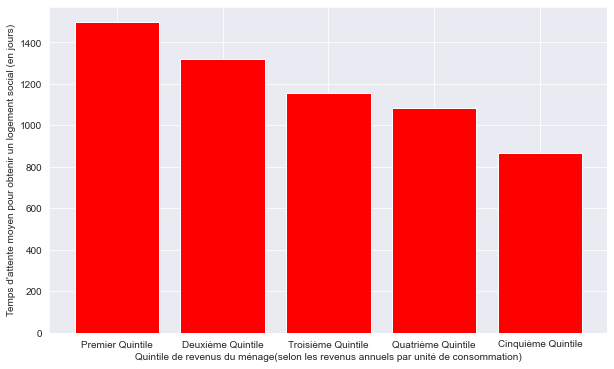

In [58]:
dfplot.reset_index(inplace=True)
fig = plt.figure(1, figsize=(10, 6))
plt.bar(dfplot["Quintile"], dfplot['Temps attente'], color="red")
plt.xlabel('Quintile de revenus du ménage(selon les revenus annuels par unité de consommation)')
plt.ylabel("Temps d'attente moyen pour obtenir un logement social (en jours)")

### En fonction de l'âge

In [174]:
pauvres = dfd1[dfd1['Catégorie']== 'Pauvres']
autres = dfd1[dfd1['Catégorie']== 'Autres']

In [175]:
pauvres

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente,Durée effective attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64,0.555556,6.666667,Pauvres,30 à 39 ans,144,Moins d'un an
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70,0.666667,8.000000,Pauvres,50 à 59 ans,382,Entre 1 an et 2 ans
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46,0.666667,8.000000,Pauvres,30 à 39 ans,423,Entre 1 an et 2 ans
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27,1.000000,12.000000,Pauvres,0 à 29 ans,329,Moins d'un an
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16,1.000000,12.000000,Pauvres,40 à 49 ans,142,Moins d'un an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,175110822671500002,2.1,2233,2008-11-01,2018-10-30,33,Concubin (e),T3,Logement trop petit,58,1063.333333,12760.000000,Pauvres,30 à 39 ans,3650,Entre 5 ans et 10 ans
12467,111081485961593B10,1.8,1914,2014-08-01,2018-08-08,36,Marié (e),T3,Logement trop petit,63,1063.333333,12760.000000,Pauvres,30 à 39 ans,1468,Entre 4 ans et 5 ans
12468,111071641986693050,1.8,1914,2016-07-12,2018-09-26,46,Marié (e),T3,Logement trop petit,67,1063.333333,12760.000000,Pauvres,40 à 49 ans,806,Entre 2 ans et 3 ans
12469,111051638496710129,2.9,3084,2016-05-31,2018-05-03,53,Concubin (e),T4,Démolition,89,1063.448276,12761.379310,Pauvres,50 à 59 ans,702,Entre 1 an et 2 ans


In [176]:
attentep=pauvres[[ "Age", "Temps attente"]]
dfplotp = attentep.groupby('Age').mean()
dfplotp['Temps attente'] = dfplotp['Temps attente'].values.astype(np.int64)
dfplotp

,Temps attente
Age,
0 à 29 ans,863
30 à 39 ans,1269
40 à 49 ans,1573
50 à 59 ans,1818
60 à 69ans,1859
70 ans et plus,1541


In [177]:
dfplotp.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

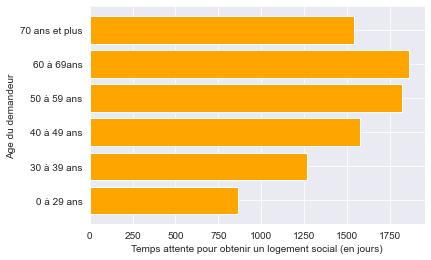

In [178]:
plt.barh(dfplotp["Age"], dfplotp['Temps attente'], color="orange")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Age du demandeur')

In [179]:
attentea=autres[[ "Age", "Temps attente"]]
dfplota = attentea.groupby('Age').mean()
dfplota['Temps attente'] = dfplota['Temps attente'].values.astype(np.int64)
dfplota.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

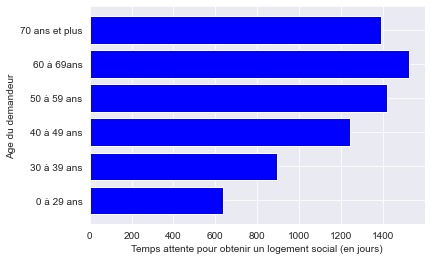

In [180]:
plt.barh(dfplota["Age"], dfplota['Temps attente'], color="blue")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Age du demandeur')

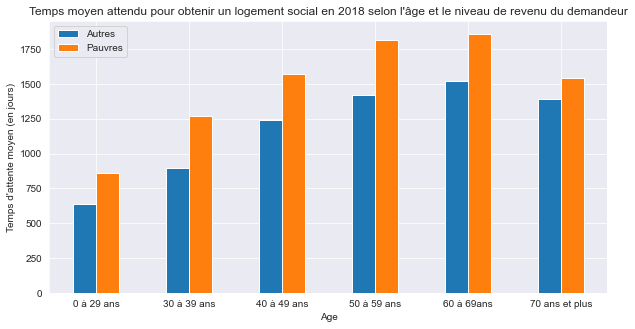

In [192]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['Age','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', ylabel='Temps d\'attente moyen (en jours)', title='Temps moyen attendu pour obtenir un logement social en 2018 selon l\'âge et le niveau de revenu du demandeur', figsize=(10,5), rot=0)
plt.legend(['Autres', 'Pauvres'], loc='upper left')

In [193]:
DFGPlot.figure.savefig('Temps d\'attente_Age.pdf')

### En fonction du type de logement attribué

In [194]:
attentep=pauvres[[ "Type du logement attribué", "Temps attente"]]
dfplotp = attentep.groupby('Type du logement attribué').mean()
dfplotp['Temps attente'] = dfplotp['Temps attente'].values.astype(np.int64)
dfplotp.reset_index(inplace=True)
attentea=autres[[ "Type du logement attribué", "Temps attente"]]
dfplota = attentea.groupby('Type du logement attribué').mean()
dfplota['Temps attente'] = dfplota['Temps attente'].values.astype(np.int64)
dfplota.reset_index(inplace=True)

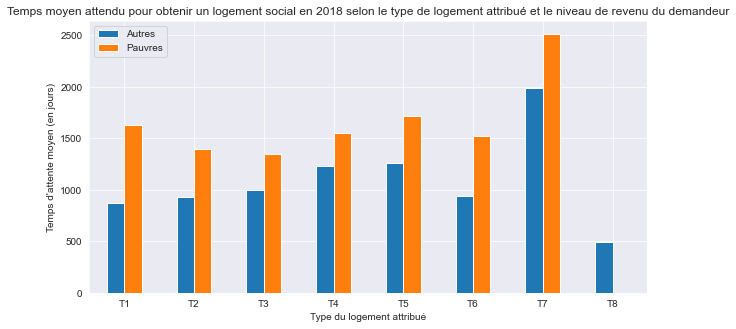

In [195]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['Type du logement attribué','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', ylabel='Temps d\'attente moyen (en jours)', title='Temps moyen attendu pour obtenir un logement social en 2018 selon le type de logement attribué et le niveau de revenu du demandeur', figsize=(10,5), rot=0)
plt.legend(['Autres', 'Pauvres'], loc='upper left')

In [196]:
DFGPlot.figure.savefig('Temps d\'attente_Type logement attribué.pdf')

### En fonction du motif n°1 ayant motivé la demande

In [197]:
attentep=pauvres[[ "motif n°1 de la demande", "Temps attente"]]
dfplotp = attentep.groupby('motif n°1 de la demande').mean()
dfplotp['Temps attente'] = dfplotp['Temps attente'].values.astype(np.int64)
dfplotp.reset_index(inplace=True)
attentea=autres[[ "motif n°1 de la demande", "Temps attente"]]
dfplota = attentea.groupby('motif n°1 de la demande').mean()
dfplota['Temps attente'] = dfplota['Temps attente'].values.astype(np.int64)
dfplota.reset_index(inplace=True)

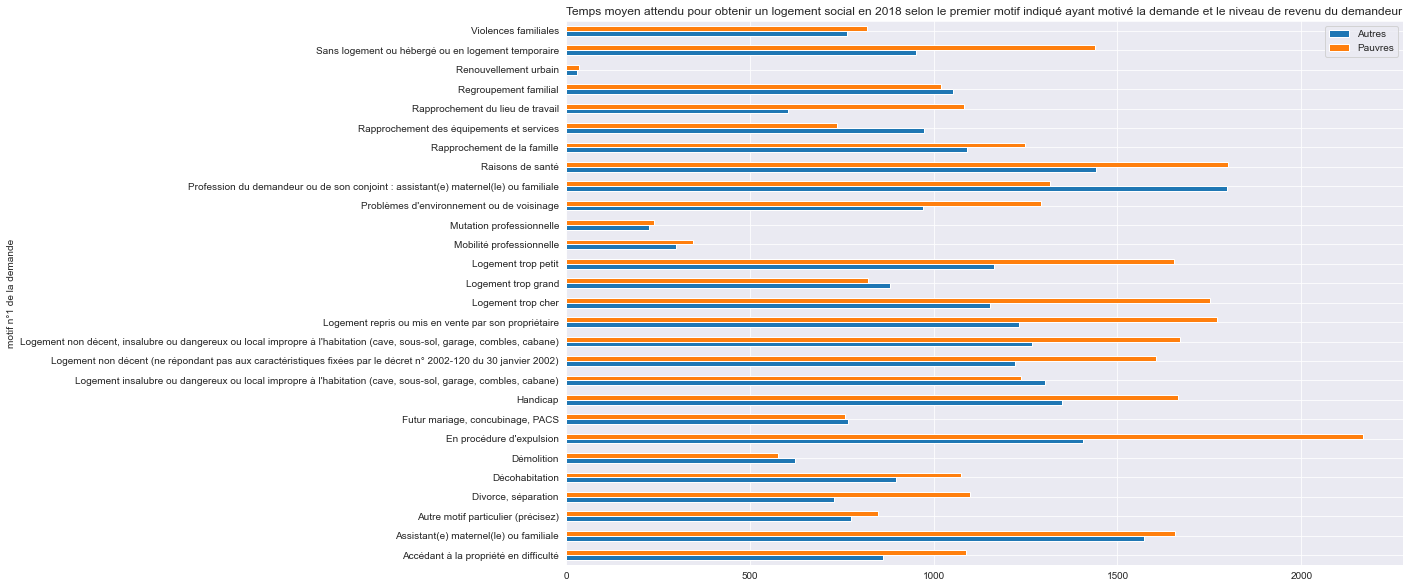

In [217]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['motif n°1 de la demande','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='barh', ylabel='Temps d\'attente moyen (en jours)', title='Temps moyen attendu pour obtenir un logement social en 2018 selon le premier motif indiqué ayant motivé la demande et le niveau de revenu du demandeur', figsize=(15,10))
plt.legend(['Autres', 'Pauvres'], loc='upper right')

In [215]:
DFGPlot.figure.savefig('Temps d\'attente_Motif.pdf')

Il faudrait réarranger le graph au niveau de la lisibilité. On pourrait aussi créer une fonction qui donne le graph en fonction d'une colonne en entrée (motif, quintile, sexe, tranches d'âge,....). Il faudrait pour cela au préalable avoir un dataframe nettoyé. Trier aussi par ordre croissant les motifs avec la commande sort.

Sur les motifs on a l'impression que c'est pour les motfis relatifs à des mobilités professionnelles, ou liés à des violences conjugales que le temps est moins loin (pour les gens qui ont une certane stabilité professionnelle, ou pour les cas d'extrême urgence). Je ne comprends pas trop ce que fait le "assistante maternelle" dans la liste.